# ML Finance

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
amd_df = pd.read_csv('./data/AMD.csv')

In [3]:
amd_df.head()

,Date,Adj_Close,Adj_Volume
0,1983-03-21,8.997535,510800.0
1,1983-03-22,8.497672,328000.0
2,1983-03-23,8.717612,427200.0
3,1983-03-24,8.780094,393200.0
4,1983-03-25,8.872569,210400.0


## EDA plots

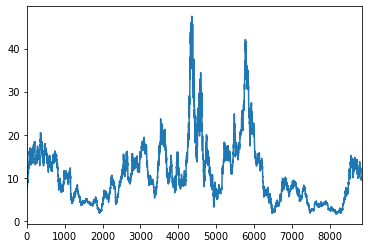

In [4]:
amd_df['Adj_Close'].plot()
plt.show()

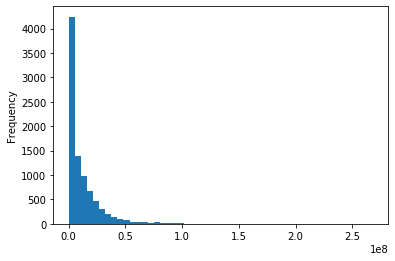

In [5]:
plt.clf()
vol = amd_df['Adj_Volume']
vol.plot.hist(bins=50)
plt.show()

## price changes

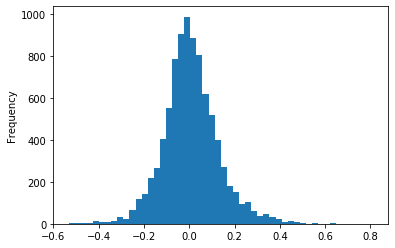

In [6]:
amd_df['10d_close_pct'] = amd_df['Adj_Close'].pct_change(10)
amd_df['10d_close_pct'].plot.hist(bins=50)
plt.show()

## Shift data

In [7]:
amd_df['10d_future_close'] = amd_df['Adj_Close'].shift(-10)   # 未来10天  shit -10
amd_df['10d_future_close_pct'] = amd_df['10d_future_close'].pct_change(10)

## Correlations

In [8]:
corr = amd_df.corr()
print(corr)

                      Adj_Close  Adj_Volume  10d_close_pct  10d_future_close  \
Adj_Close              1.000000   -0.050098       0.081807          0.976953   
Adj_Volume            -0.050098    1.000000       0.029516         -0.053057   
10d_close_pct          0.081807    0.029516       1.000000          0.091179   
10d_future_close       0.976953   -0.053057       0.091179          1.000000   
10d_future_close_pct  -0.092566   -0.027597       0.044222          0.081744   

                      10d_future_close_pct  
Adj_Close                        -0.092566  
Adj_Volume                       -0.027597  
10d_close_pct                     0.044222  
10d_future_close                  0.081744  
10d_future_close_pct              1.000000  


## Ex1

In [9]:
lng_df = pd.read_csv('./data/LNG.csv')
spy_df = pd.read_csv('./data/SPY.csv')

print(lng_df.head())  # examine the DataFrames

         Date  Adj_Close  Adj_Volume
0  1994-04-04       72.0         0.0
1  1994-04-05      108.0         0.0
2  1994-04-06      108.0         0.0
3  1994-04-07      108.0         0.0
4  1994-04-08      108.0         0.0


In [10]:
print(spy_df.head())  # examine the SPY DataFrame

         Date  Adj_Close  Adj_Volume
0  1993-01-29  28.223927   1003200.0
1  1993-02-01  28.424666    480500.0
2  1993-02-02  28.484856    201300.0
3  1993-02-03  28.785997    529400.0
4  1993-02-04  28.906440    531500.0


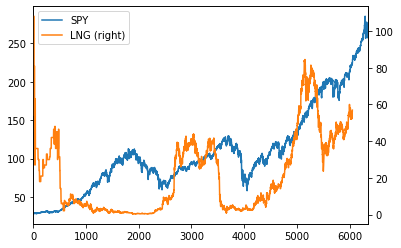

In [11]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

Text(0.5, 0, 'adjusted close 1-day percent change')

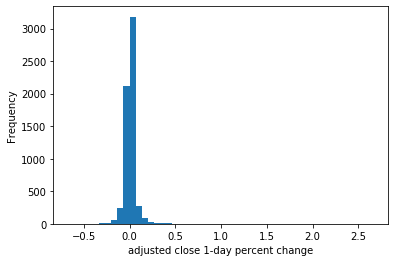

In [12]:
plt.clf()  # clear the plot space

# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.034733
5d_close_future_pct     -0.034733             1.000000


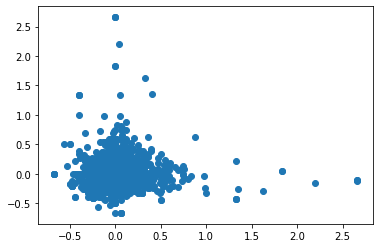

In [13]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)   # 5-day % change for 5 days in the future
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)   # 5-day % change for the current day

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

## Making features and targets

In [14]:
features = amd_df[['10d_close_pct', 'Adj_Volume']]
targets = amd_df['10d_future_close_pct']
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(type(targets))

<class 'pandas.core.series.Series'>


In [16]:
#Moving averages
#Moving averages:

#use n past days to get average
#common values for n: 14, 50, 200

In [17]:
import talib
amd_df['ma200'] = talib.SMA(amd_df['Adj_Close'].values, timeperiod=200)
amd_df['rsi200'] = talib.RSI(amd_df['Adj_Close'].values, timeperiod=200)

In [18]:
feature_names = ['10d_close_pct', 'ma200', 'rsi200']
features = amd_df[feature_names]
targets = amd_df['10d_future_close_pct']

#feature_target_df = amd_df[feature_names] + amd_df['10d_future_close_pct']

feature_target_df = pd.concat([features, targets], axis=1)

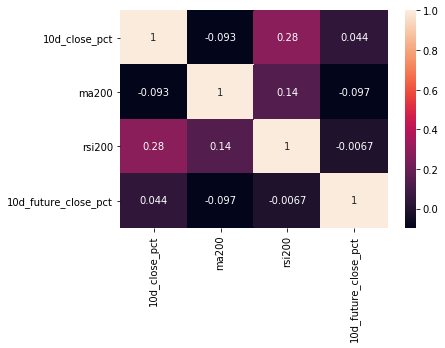

In [19]:
import seaborn as sns

corr = feature_target_df.corr()
sns.heatmap(corr, annot=True)

In [20]:
## relative strength index - RSI＝[上升平均数÷(上升平均数＋下跌平均数)]×100
# https://wiki.mbalib.com/wiki/%E7%9B%B8%E5%AF%B9%E5%BC%BA%E5%BC%B1%E6%8C%87%E6%A0%87

## Ex. Create moving average and RSI features

In [23]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [24]:
# Drop all na values
lng_df = lng_df.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.002773  0.005459 -0.023049   
5d_close_pct                   -0.002773      1.000000 -0.719633  0.472503   
ma14                            0.005459     -0.719633  1.000000 -0.656969   
rsi14                          -0.023049      0.472503 -0.656969  1.000000   
ma30                            0.038721     -0.529670  0.866246 -0.734508   
rsi30                          -0.018082      0.340750 -0.548970  0.940057   
ma50                            0.057731     -0.392255  0.726730 -0.694763   
rsi50                          -0.011972      0.261279 -0.476323  0.844811   
ma200                           0.142356     -0.137455  0.439388 -0.432523   
rsi200                          0.007269      0.115605 -0.279927  0.409289   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.038721 -0.018082  0.057731 -0.011972  0.14235

## Check the correlations

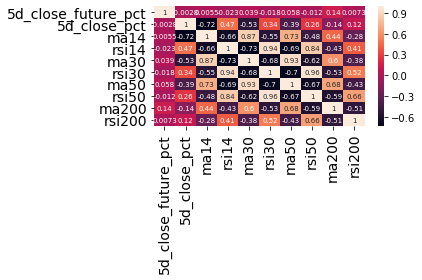

In [28]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot= True, annot_kws = {"size": 7})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()# show the plot

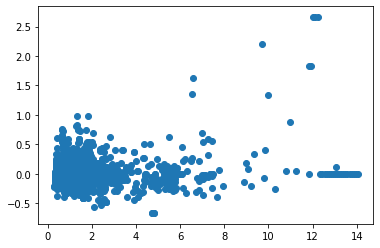

In [30]:
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['ma200'], lng_df['5d_close_future_pct'])
plt.show()

## Make train and test sets

In [31]:
import statsmodels.api as sm
linear_features = sm.add_constant(features)
train_size = int(0.85 * targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]

C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
# some_list[start:stop:step]

## Linear modeling

In [34]:
model = sm.OLS(train_targets, train_features)
results = model.fit()

In [35]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.041
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     23.79
Date:                 Tue, 26 May 2020   Prob (F-statistic):           3.01e-40
Time:                         11:43:04   Log-Likelihood:                 2318.3
No. Observations:                 4969   AIC:                            -4617.
Df Residuals:                     4959   BIC:                            -4552.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0171      0.039    

In [36]:
print(results.pvalues)

const           6.587567e-01
5d_close_pct    1.165180e-02
ma14            1.003838e-04
rsi14           1.114091e-03
ma30            3.675255e-01
rsi30           4.643474e-01
ma50            3.860107e-01
rsi50           1.957027e-01
ma200           1.920495e-36
rsi200          3.463175e-02
dtype: float64


## Ex. Create train and test features

In [37]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(5847, 10) (4969, 10) (878, 10)


In [38]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.041
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     23.79
Date:                 Tue, 26 May 2020   Prob (F-statistic):           3.01e-40
Time:                         11:54:04   Log-Likelihood:                 2318.3
No. Observations:                 4969   AIC:                            -4617.
Df Residuals:                     4959   BIC:                            -4552.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0171      0.039    

In [40]:
## Evaluate our results
#Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. Ideally, we want to back-test any type of trading strategy. However, this is a complex and typically time-consuming experience.
#A quicker way to understand the performance of our model is looking at regression evaluation metrics like R2, and plotting the predictions versus the actual values of the targets. Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of price changes. We can use matplotlib's .scatter() function to create scatter plots of the predictions and actual values.

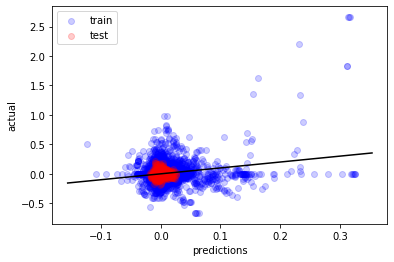

In [43]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()